# Scikit-Image Model Deployment

In [1]:
import collections
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import os
import pandas as pd
import pickle
import re
from scipy import ndimage
from skimage import (
    io,
    color,
    exposure,
    transform,
    feature
)
import seaborn as sns

## Image Dataset Preparation

### Get Image Dataset from Local Directory

In [2]:
# get list of classes https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html
data_dir = os.listdir('./labelled_data')
print(data_dir)
# ['Adenium', 'Alpinia_Purpurata', 'Alstroemeria_Aurantiaca', 'Anthurium_Andraeanum', 'Antirrhinum', 'Billbergia_Pyramidalis', 'Cattleya_Mossiae', 'Cirsium_Altissimum', 'Gazania_Rigens', 'Gerbera_Jamesonii', 'Gladiolus', 'Guzmania_Lingulata', 'Helianthus_Annuus', 'Iris_Pseudacorus', 'Leucanthemum', 'Narcissus_Pseudonarcissus', 'Nasturtium', 'Nerine_Sarniensis', 'Nymphaea_Tetragona', 'Oenothera_Suffrutescens', 'Paphiopedilum_Micranthum', 'Passiflora', 'Pelargonium_Inquinans', 'Petunia', 'Platycodon_Grandiflorus', 'Plumeria_Alba', 'Poinsettia', 'Primula_Vulgaris', 'Protea_Cynaroides', 'Rose', 'Rudbeckia', 'Strelitzia_Reginae', 'Tropaeolum_Majus', 'Tussilago', 'Viola_Tricolor', 'Coccinia_Grandis', 'Fritillaria_Meleagris', 'Crocus', 'Cyclamen', 'Dahlia_Bishop_of_Llandaff', 'Datura_Metel', 'Dianthus_Barbatus', 'Digitalis', 'Echinacea_Purpurea', 'Echinops_Bannaticus']

['Adenium', 'Alpinia_Purpurata', 'Alstroemeria_Aurantiaca', 'Anthurium_Andraeanum', 'Antirrhinum', 'Billbergia_Pyramidalis', 'Cattleya_Mossiae', 'Cirsium_Altissimum', 'Gazania_Rigens', 'Gerbera_Jamesonii', 'Gladiolus', 'Guzmania_Lingulata', 'Helianthus_Annuus', 'Iris_Pseudacorus', 'Leucanthemum', 'Narcissus_Pseudonarcissus', 'Nasturtium', 'Nerine_Sarniensis', 'Nymphaea_Tetragona', 'Oenothera_Suffrutescens', 'Paphiopedilum_Micranthum', 'Passiflora', 'Pelargonium_Inquinans', 'Petunia', 'Platycodon_Grandiflorus', 'Plumeria_Alba', 'Poinsettia', 'Primula_Vulgaris', 'Protea_Cynaroides', 'Rose', 'Rudbeckia', 'Strelitzia_Reginae', 'Tropaeolum_Majus', 'Tussilago', 'Viola_Tricolor', 'Coccinia_Grandis', 'Fritillaria_Meleagris', 'Crocus', 'Cyclamen', 'Dahlia_Bishop_of_Llandaff', 'Datura_Metel', 'Dianthus_Barbatus', 'Digitalis', 'Echinacea_Purpurea', 'Echinops_Bannaticus']


In [4]:
glob('./labelled_data/{}/*.jpg'.format('Helianthus_Annuus'))

# ['./labelled_data/Helianthus_Annuus/image_05416.jpg',
#  './labelled_data/Helianthus_Annuus/image_05435.jpg',
#  './labelled_data/Helianthus_Annuus/image_05399.jpg',
#  ...

['./labelled_data/Helianthus_Annuus/image_05416.jpg',
 './labelled_data/Helianthus_Annuus/image_05435.jpg',
 './labelled_data/Helianthus_Annuus/image_05399.jpg',
 './labelled_data/Helianthus_Annuus/image_05400.jpg',
 './labelled_data/Helianthus_Annuus/image_05401.jpg',
 './labelled_data/Helianthus_Annuus/image_05402.jpg',
 './labelled_data/Helianthus_Annuus/image_05403.jpg',
 './labelled_data/Helianthus_Annuus/image_05404.jpg',
 './labelled_data/Helianthus_Annuus/image_05405.jpg',
 './labelled_data/Helianthus_Annuus/image_05406.jpg',
 './labelled_data/Helianthus_Annuus/image_05407.jpg',
 './labelled_data/Helianthus_Annuus/image_05408.jpg',
 './labelled_data/Helianthus_Annuus/image_05409.jpg',
 './labelled_data/Helianthus_Annuus/image_05410.jpg',
 './labelled_data/Helianthus_Annuus/image_05411.jpg',
 './labelled_data/Helianthus_Annuus/image_05412.jpg',
 './labelled_data/Helianthus_Annuus/image_05413.jpg',
 './labelled_data/Helianthus_Annuus/image_05414.jpg',
 './labelled_data/Helianthus

In [6]:
all_files = []
for subfolder in data_dir:
    all_files += glob('./labelled_data/{}/*.jpg'.format(subfolder))
    
len(all_files)
# 4555

4555

In [7]:
data_collection = io.ImageCollection(all_files)
data_collection.files
# ['./labelled_data/Adenium/image_04767.jpg',
#  './labelled_data/Adenium/image_04768.jpg',
#  './labelled_data/Adenium/image_04769.jpg',
#  ...

['./labelled_data/Adenium/image_04767.jpg',
 './labelled_data/Adenium/image_04768.jpg',
 './labelled_data/Adenium/image_04769.jpg',
 './labelled_data/Adenium/image_04770.jpg',
 './labelled_data/Adenium/image_04771.jpg',
 './labelled_data/Adenium/image_04772.jpg',
 './labelled_data/Adenium/image_04773.jpg',
 './labelled_data/Adenium/image_04774.jpg',
 './labelled_data/Adenium/image_04775.jpg',
 './labelled_data/Adenium/image_04776.jpg',
 './labelled_data/Adenium/image_04777.jpg',
 './labelled_data/Adenium/image_04781.jpg',
 './labelled_data/Adenium/image_04782.jpg',
 './labelled_data/Adenium/image_04783.jpg',
 './labelled_data/Adenium/image_04784.jpg',
 './labelled_data/Adenium/image_04785.jpg',
 './labelled_data/Adenium/image_04786.jpg',
 './labelled_data/Adenium/image_04787.jpg',
 './labelled_data/Adenium/image_04788.jpg',
 './labelled_data/Adenium/image_04789.jpg',
 './labelled_data/Adenium/image_04790.jpg',
 './labelled_data/Adenium/image_04791.jpg',
 './labelled_data/Adenium/image_

In [8]:
len(data_collection)

4555

In [9]:
data_collection.files[4554]

'./labelled_data/Viola_Tricolor/image_04243.jpg'

### Resize to 80,80,3

In [ ]:
c = 0

for image in data_collection:
    img_ori = io.imread(data_collection.files[c], as_gray=False)
    img_thumb = transform.resize(img_ori, output_shape=(80, 80, 3), anti_aliasing=True)
    plt.imsave(data_collection.files[c], img_thumb)
    c = c + 1

### Get Image Labels from Folder Structure

In [11]:
# use regular expression to extract folder name as label - example:
re.search(
    r'./labelled_data/(.*?)/',
    './labelled_data/Helianthus_Annuus/image_04481.jpg'
).group(1)
# label extracted: 'Helianthus_Annuus'

'Helianthus_Annuus'

In [14]:
def extract_labels(location):
    label = re.search(
        r'./labelled_data/(.*?)/', location
    ).group(1)
    
    return label

In [15]:
labels = list(map(extract_labels, data_collection.files))
list(set(labels))
# ['Oenothera_Suffrutescens',
#  'Plumeria_Alba',
#  'Cyclamen',
#  ...
#  'Nasturtium',
#  'Helianthus_Annuus']

['Poinsettia',
 'Oenothera_Suffrutescens',
 'Billbergia_Pyramidalis',
 'Guzmania_Lingulata',
 'Digitalis',
 'Gladiolus',
 'Cirsium_Altissimum',
 'Nasturtium',
 'Tussilago',
 'Adenium',
 'Dahlia_Bishop_of_Llandaff',
 'Echinacea_Purpurea',
 'Cattleya_Mossiae',
 'Fritillaria_Meleagris',
 'Nerine_Sarniensis',
 'Rose',
 'Antirrhinum',
 'Alpinia_Purpurata',
 'Passiflora',
 'Primula_Vulgaris',
 'Leucanthemum',
 'Rudbeckia',
 'Paphiopedilum_Micranthum',
 'Echinops_Bannaticus',
 'Cyclamen',
 'Narcissus_Pseudonarcissus',
 'Tropaeolum_Majus',
 'Alstroemeria_Aurantiaca',
 'Crocus',
 'Pelargonium_Inquinans',
 'Gerbera_Jamesonii',
 'Petunia',
 'Datura_Metel',
 'Platycodon_Grandiflorus',
 'Nymphaea_Tetragona',
 'Plumeria_Alba',
 'Strelitzia_Reginae',
 'Helianthus_Annuus',
 'Protea_Cynaroides',
 'Dianthus_Barbatus',
 'Gazania_Rigens',
 'Iris_Pseudacorus',
 'Viola_Tricolor',
 'Anthurium_Andraeanum',
 'Coccinia_Grandis']

### Dataset Export

In [16]:
def buffer(item):
    return item

# dataset_arrs = np.array(list(map(buffer,dataset)))
dataset_list = list(map(buffer, data_collection))
dataset_array = np.asarray(dataset_list)
dataset_array.shape
# (4555, 80, 80, 3)

(4555, 80, 80, 3)

In [17]:
data_dict = dict()

data_dict['description'] = '4555 80x80 RGB images of 45 classes.'
data_dict['data'] = dataset_array
data_dict['target'] = labels
data_dict['labels'] = set(labels)

In [18]:
label_distribution = collections.Counter(data_dict['target'])

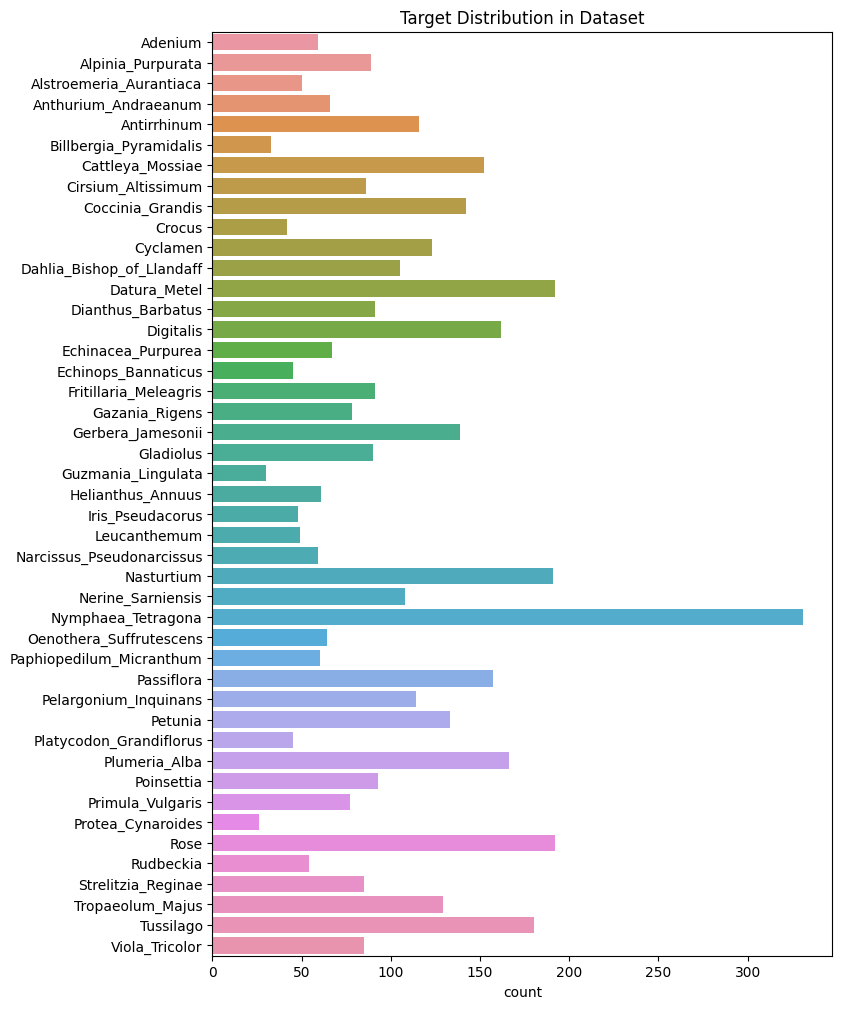

In [19]:
plt.figure(figsize=(8, 12))
plt.title('Target Distribution in Dataset')

sns.countplot(
    data=data_dict,
    y='target',
    orient='v'
)

plt.savefig('assets/Scikit_Image_Model_Deployment_01.webp', bbox_inches='tight')

![Scikit-Image Introduction](./assets/Scikit_Image_Model_Deployment_01.webp)

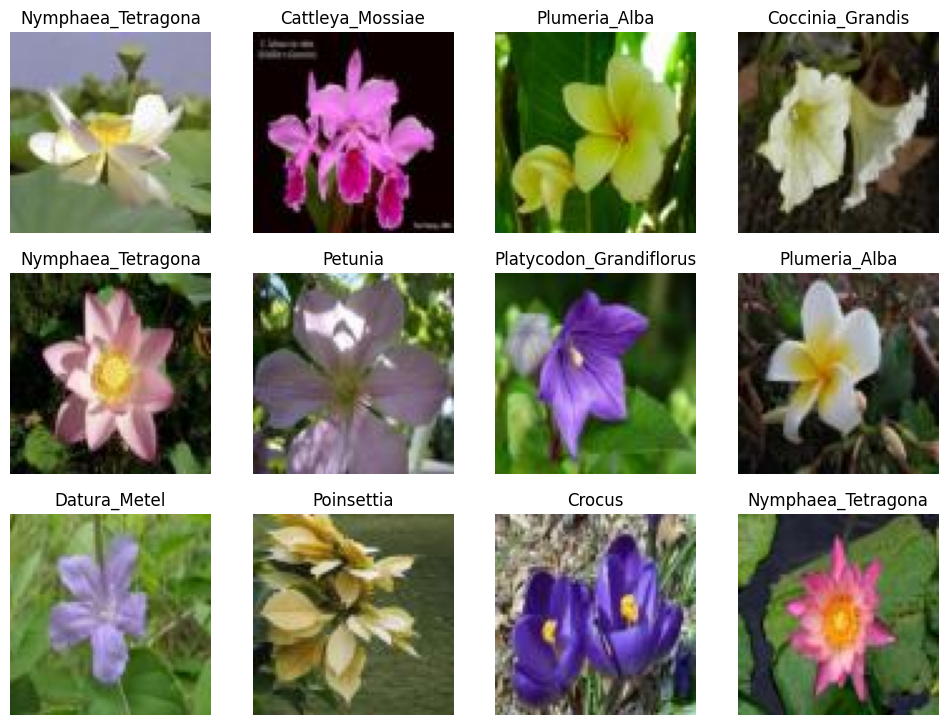

In [20]:
# plot multiple random images with labels
ran_gen = np.random.default_rng()

plt.figure(figsize=(12, 12))

for i in range(12):
    ax = plt.subplot(4, 4, i+1)
    random_index = ran_gen.integers(low=0, high=4555, size=1)
    plt.imshow(data_dict['data'][random_index[0]])
    plt.title(data_dict['target'][random_index[0]])
    plt.axis(False)

plt.savefig('assets/Scikit_Image_Model_Deployment_02.webp', bbox_inches='tight')

![Scikit-Image Introduction](./assets/Scikit_Image_Model_Deployment_02.webp)

In [21]:
# save the dateset
output = open('./flowers.pkl', 'wb')
pickle.dump(data_dict, output)